In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Longs data.csv')
print(df.columns)
df=df.drop('REGION', axis=1)

#dfs: Preprocessed_Solar_Power_Data_v3.1.csv, predicted_solar_data.csv


Index(['REGION', 'DATETIME', 'TOTALDEMAND', 'RRP', 'ALLSKY_SFC_SW_DWN', 'T2M',
       'T2MDEW', 'T2MWET', 'RH2M', 'PS', 'WS2M'],
      dtype='object')


Convert irradience to power hr by hr

Reccomended battery size:5kwh
Reccomended solar array size:8m^2


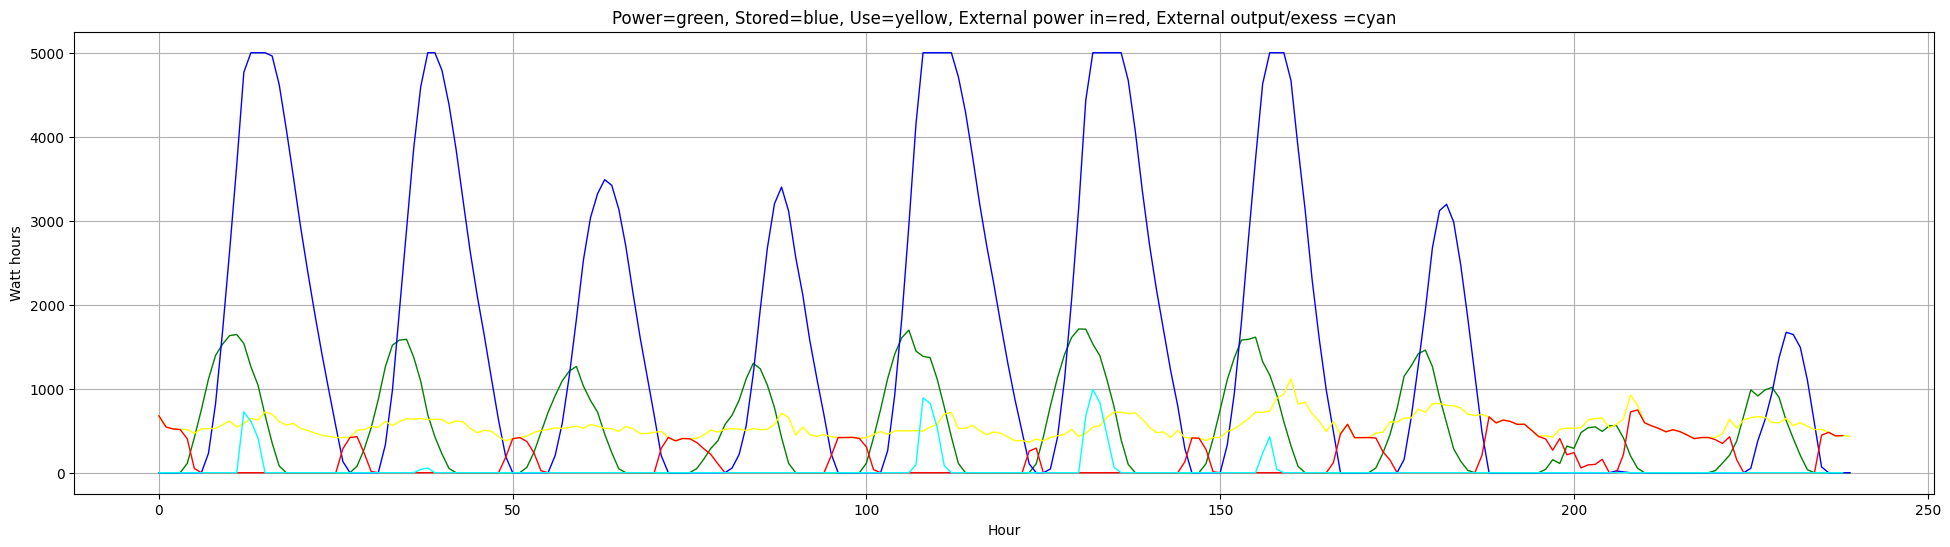

power used (Wh): 131304
power generated (Wh): 106610
percentage solar power used (Wh): 75.44%
External power used (Wh): 32250
Power exess output (Wh): 7989


In [7]:
findideal=int(input('Input 0 for graphing a particular system, 1 for 50% solar powered, 2 for 70%, 3 for 90%, 4 for 100%, 5 for 100% with 10% minimum stored, 6 100%, 20% min, 7 for 100%, 50% min or 8 for custom values')) 
if findideal == 8:
    sp=int(input('percentage solar desired')/100)
    if sp == 1:
        minimum=int(input('minimum percentage stored')/100)
elif findideal == 1:
    sp=0.5
    minimum=0
elif findideal == 2:
    sp=0.7
    minimum=0
elif findideal == 3:
    sp=0.9
    minimum=0
elif findideal == 4:
    sp=1
    minimum=0
elif findideal == 5:
    sp=1
    minimum=0.1
elif findideal == 6:
    sp=1
    minimum=0.2
elif findideal == 7:
    sp=1
    minimum=0.5
elif findideal == 0:
    solararea=int(input("Input solar area (m^2)"))
    batterycap=int(input("Input battery storage (Wh)"))
else:
    print('ok then')
    0/0


data=input('Input name of csv for irradiance and demand (Irradiance and Demand accordingly)')
solarefficiency=float(input("Input solar efficiency (%) (input 0 for average: 20%)"))/100
starttime=int(input('Input hour start'))
duration=int(input('Input duration (hours)'))

usagepredict=int(input('Input building daily power use prediction (Wh) (input 0 for average household:16340)'))

if usagepredict == 0: 
    usagepredict=16340 
if solarefficiency ==0:
    solarefficiency=0.2
df=pd.read_csv(data)
irradience = df['Irradience'].tolist()
demand = df['Demand'].tolist()
demanddevisor=((usagepredict*len(demand))/(sum(demand)*24))
power=[0]
stored=[0]
use=[0]
externali=[]
externalo=[]
if findideal ==0:
    powerperpower=solararea*solarefficiency
    for i in range(starttime,starttime+duration):
        power.append(powerperpower*irradience[i])
        use.append(demand[i]*demanddevisor)
        change=(power[i-starttime]-use[i-starttime])
        if stored[i-starttime]+change >= batterycap:
            stored.append(batterycap)
            externalo.append((stored[i-starttime]+change)-batterycap)
            externali.append(0)
        elif stored[i-starttime]+change <= 0:
            stored.append(0)
            externali.append((-1)*(stored[i-starttime]+change))
            externalo.append(0)
        else:
            stored.append(stored[i-starttime]+change)
            externali.append(0)
            externalo.append(0)
        
elif sp==1:
    b=0
    a=0
    batterysizes=[2,3,5,7,10,13,15,20]
    arraysizes=[1,2,4,8,12,16,20,24,30,35,40]
    while True is True:
        if b >=7:
            batterysizes.append(batterysizes[b]*1.5//1)
        batterycap=batterysizes[b]*1000
        if a >=10:
            arraysizes.append(arraysizes[a]*1.5//1)
        powerperpower=arraysizes[a]*solarefficiency
        power=[0]
        stored=[0]
        use=[0]
        externali=[]
        externalo=[]
        batterymin=minimum*batterycap
        fail=False
        maxxed=False
        for i in range(starttime,starttime+duration):
            power.append(powerperpower*irradience[i])
            use.append(demand[i]*demanddevisor)
            change=(power[i-starttime]-use[i-starttime])
            if stored[i-starttime]+change >= batterycap:
                stored.append(batterycap)
                externalo.append((stored[i-starttime]+change)-batterycap)
                maxxed=True
                externali.append(0)
            elif stored[i-starttime]+change <= 0:
                stored.append(0)
                externali.append((-1)*(stored[i-starttime]+change))
                externalo.append(0)
            else:
                stored.append(stored[i-starttime]+change)
                externali.append(0)
                externalo.append(0)
            if i-starttime <=10 and stored[i-starttime]<=batterymin:
                stored[i-starttime]=batterymin
            elif stored[i-starttime]<=batterymin:
                fail=True
                break
        if fail==True and maxxed==False:
            a+=1
        elif fail==True and maxxed==True:
            b+=1
        else:
            print(f'Reccomended battery size:{batterysizes[b]}kwh')
            print(f'Reccomended solar array size:{arraysizes[a]}m^2')
            break
else:
    b=0
    a=0
    batterysizes=[2,3,5,7,10,13,15,20]
    arraysizes=[1,2,4,8,12,16,20,24,30,35,40]
    while True is True:
        if b >=7:
            batterysizes.append(batterysizes[b]*1.5//1)
        batterycap=batterysizes[b]*1000
        if a >=10:
            arraysizes.append(arraysizes[a]*1.5//1)
        powerperpower=arraysizes[a]*solarefficiency
        power=[0]
        stored=[0]
        use=[0]
        externali=[]
        externalo=[]
        fail=False
        maxxed=False
        for i in range(starttime,starttime+duration):
            power.append(powerperpower*irradience[i])
            use.append(demand[i]*demanddevisor)
            change=(power[i-starttime]-use[i-starttime])
            if stored[i-starttime]+change >= batterycap:
                stored.append(batterycap)
                externalo.append((stored[i-starttime]+change)-batterycap)
                maxxed=True
                externali.append(0)
            elif stored[i-starttime]+change <= 0:
                stored.append(0)
                externali.append((-1)*(stored[i-starttime]+change))
                externalo.append(0)
            else:
                stored.append(stored[i-starttime]+change)
                externali.append(0)
                externalo.append(0)
        if (1-(sum(externali)/sum(use)))< sp:
            fail=True
        if a >= 100 or b>=100:
            print('error encountered, try extending your timeframe, setting starting time during the day or reducing solar requirements')
            break
        if fail==True and maxxed==False:
            a+=1
        elif fail==True and maxxed==True:
            b+=1
        else:
            print(f'Reccomended battery size:{batterysizes[b]}kwh')
            print(f'Reccomended solar array size:{arraysizes[a]}m^2')
            break

del power[0]
del stored[0]
del use[0]
del externali[0]
del externalo[0]

plt.figure(figsize=(24, 6))
plt.plot(power,linewidth=1,color='green')
plt.plot(stored,linewidth=1,color='blue')
plt.plot(use,linewidth=1,color='yellow')
plt.plot(externali,linewidth=1,color='red')
plt.plot(externalo,linewidth=1,color='cyan')
plt.title(f'Power=green, Stored=blue, Use=yellow, External power in=red, External output/exess =cyan')
plt.xlabel('Hour')
plt.ylabel('Watt hours')
plt.grid(True)
plt.show()
print(f'power used (Wh): {sum(use):.0f}')
print(f'power generated (Wh): {sum(power):.0f}')
print(f'percentage solar power used (Wh): {(1-(sum(externali)/sum(use)))*100:.2f}%')
print(f'External power used (Wh): {sum(externali):.0f}')
print(f'Power exess output (Wh): {sum(externalo):.0f}')
